Import the image into Jupyter Notebook.

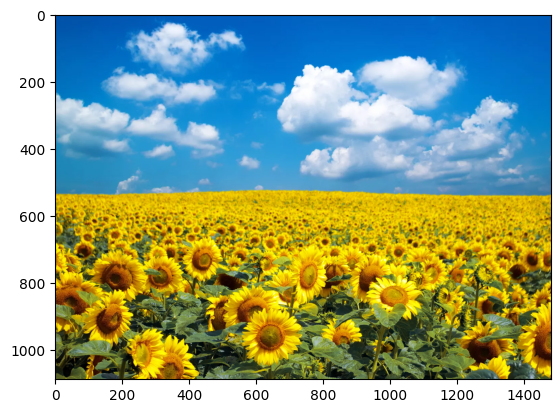

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import an image
img_inp = cv2.imread("/content/Input.png")
img_inp = cv2.cvtColor(img_inp, cv2.COLOR_BGR2RGB)
#Let's do the conversion in imshow
plt.imshow(img_inp)

Analyze the image.  

In [84]:
print(img_inp.size)
print(img_inp.shape)
print(img_inp.dtype)
print(img_inp[0][0][0])
print(img_inp)


4826280
(1087, 1480, 3)
uint8
1
[[[  1  80 167]
  [  1  80 167]
  [  1  80 167]
  ...
  [  1  91 183]
  [  1  91 183]
  [  1  91 183]]

 [[  1  80 167]
  [  1  80 167]
  [  1  80 167]
  ...
  [  1  91 183]
  [  1  91 183]
  [  1  91 183]]

 [[  1  80 167]
  [  1  80 167]
  [  1  80 167]
  ...
  [  1  91 183]
  [  1  91 183]
  [  1  91 183]]

 ...

 [[ 78  88  34]
  [ 90 102  44]
  [ 83  93  37]
  ...
  [ 52  48   8]
  [ 73  67  15]
  [ 83  79  26]]

 [[ 62  73  30]
  [ 84  94  39]
  [ 89 100  42]
  ...
  [ 11  24  17]
  [ 13  27  18]
  [ 13  27  18]]

 [[ 56  69  30]
  [ 78  87  33]
  [ 94 108  48]
  ...
  [ 18  28  15]
  [ 15  24  13]
  [ 14  23  14]]]


In [85]:
if isinstance(img_inp, np.ndarray):
  print("my_array is a numpy array")
else:
  print("my_array is not a numpy array")

my_array is a numpy array


Create a histogram of the whole image

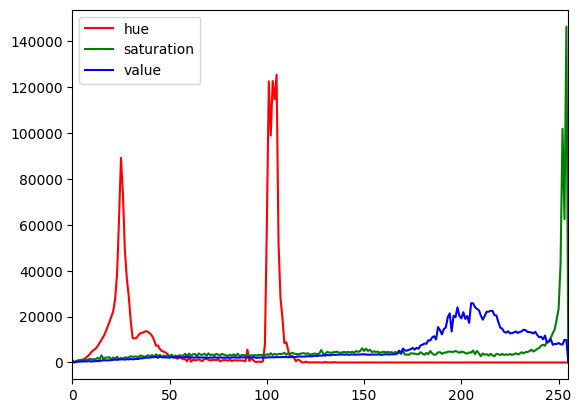

In [86]:
# Convert to HSV
img = cv2.cvtColor(img_inp, cv2.COLOR_RGB2HSV)

# Create a histogram of HSV values.

# Hue
hist = cv2.calcHist([img],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()


Modify your image with brightness and contrast so it fills the complete tonal range.


In [87]:
def adjust_brightness_contrast(image_array, alpha, beta):
# Convert to floating point to avoid overflow and underflow
  temp = image_array.astype('float32')
# Adjust contrast
  temp *= alpha
# Adjust brightness
  temp += beta
# Clip values to be in the range [0, 255]
  temp = np.clip(temp, 0, 255)
  return temp.astype('uint8')

# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [88]:
adjusted_img = adjust_brightness_contrast(img_inp, 1.1, 0)
copy_img = adjusted_img.copy()

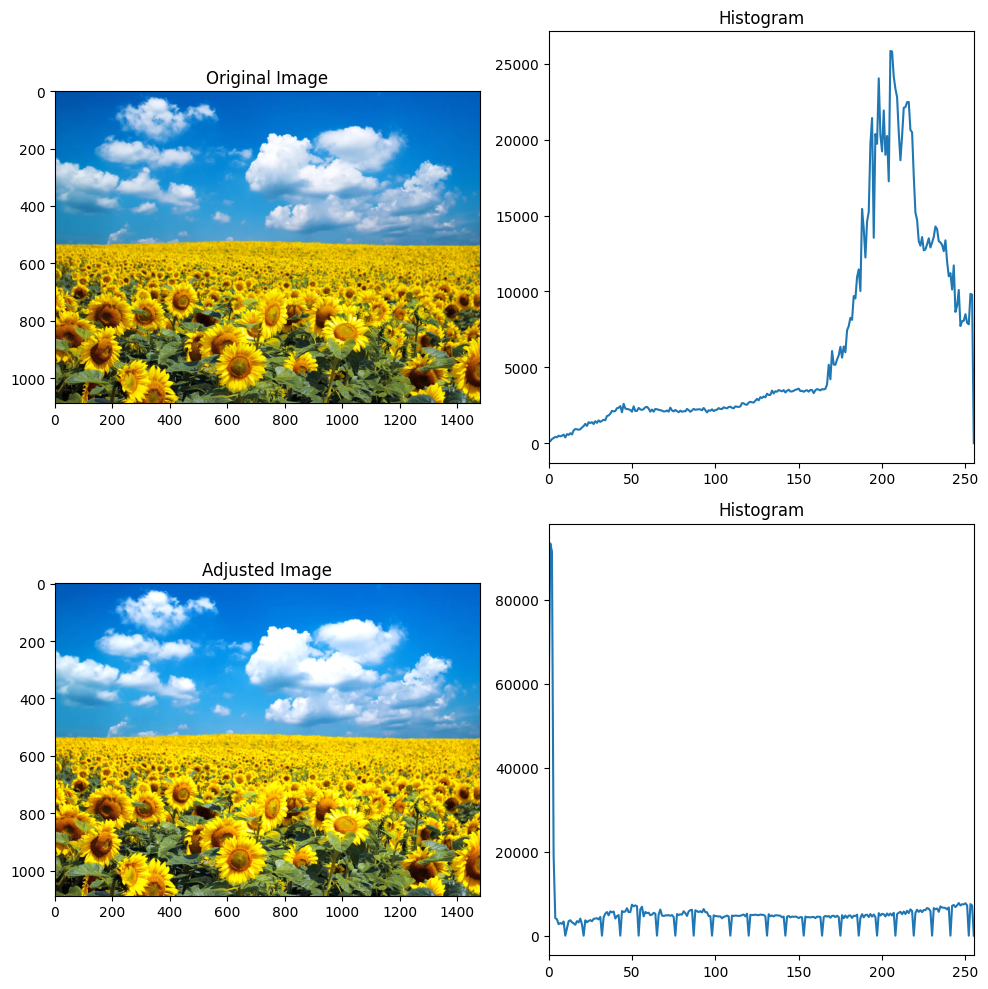

In [90]:
# Calculate histogram of adjusted image
adjusted_hist = cv2.calcHist([adjusted_img],[0],None,[256],[0,255])
# Plotting original and adjusted images side-by-side
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.imshow(img_inp, cmap="gray")
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.plot(hist)
plt.xlim([0,255])
plt.title('Histogram')
plt.subplot(2, 2, 3)
plt.imshow(adjusted_img, cmap="gray", vmin=0, vmax=255)
plt.title('Adjusted Image')
plt.subplot(2, 2, 4)
plt.plot(adjusted_hist)
plt.xlim([0,255])
plt.title('Histogram')
plt.tight_layout()
plt.show()

Create a mask of your face.

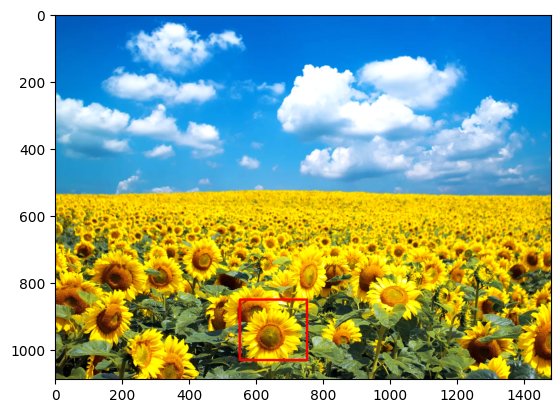

In [91]:
top_left = (550,850)
# Bottom right corner of rectangle
bottom_right = (750,1030)
# Color
rect_color = (255,0,0)
# Thickness
thickness = 5
# Rectangle function
img_rect = cv2.rectangle(adjusted_img, top_left, bottom_right, rect_color, thickness)
# Plot image
plt.imshow(img_rect)

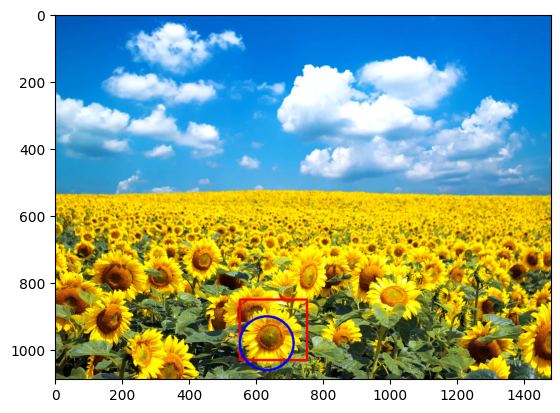

In [92]:
center_circle = (630,980)
# Radius of the circle
radius = 80
# Color
circle_color = (0, 0, 255)
# Add circle to image

img_circle = cv2.circle(adjusted_img, center_circle, radius, circle_color, thickness)
plt.imshow(img_circle)

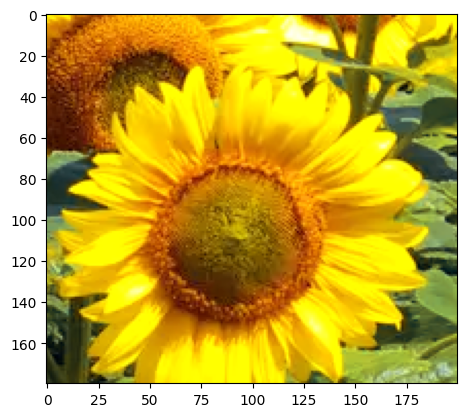

In [93]:
img_masked = copy_img[850:1030, 550:750]
plt.imshow(img_masked)

Use the mask to create a HSV histogram

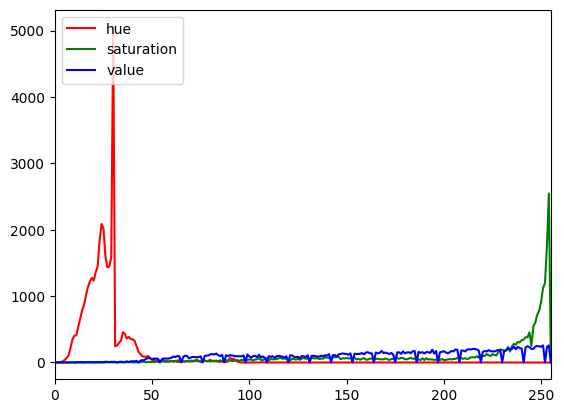

In [94]:
# Create a histogram of HSV values.
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

Use the HSV ranges to create a mask of skin tones.

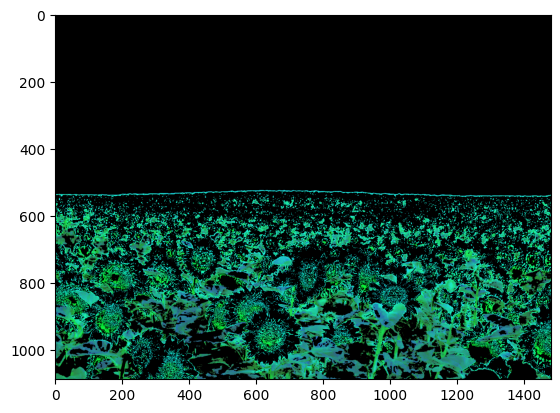

In [97]:
mask = cv2.inRange(img,np.uint8([0,100,50]),np.uint8([50,250,250]))
img_masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(img_masked)

Apply the mask to the image and segment out your skin/face.

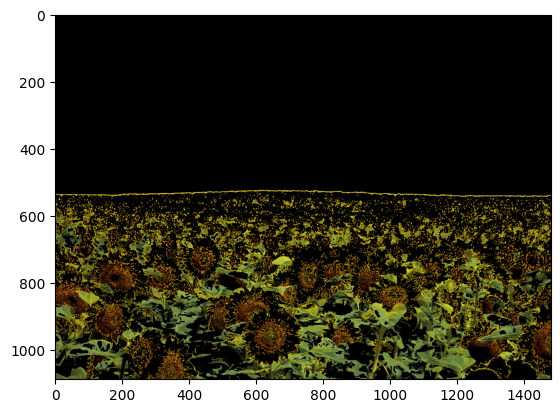

In [98]:
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_HSV2RGB)
plt.imshow(img_masked)